# La régression linéaire


## Régression linéaire
En statistique, la régression linéaire est une approche linéaire de la
modélisation de la relation entre une variable expliquée et une ou
plusieurs variables explicatives (covariables). Dans le cas d'une seule variable explicative, on parle de régression linéaire simple. Pour plus d'une variable explicative (indépendante), le processus est appelé régression linéaire
multiple. Nous allons traiter la régression linéaire simple dans ce
tutoriel.
Soit **X** la variable explicative et **Y** la variable
expliquée. Nous allons définir une relation linéaire entre ces deux
variables comme suit :

\\[ Y = aX + b \\]  
![mxplusc](SlopeInterceptLineEqu.png)

Voici l'équation d'une droite que vous avez étudiée au lycée. **a** est la pente de la droite et **b** est l'ordonnée à l'origine. Aujourd'hui, nous allons utiliser cette équation pour entraîner notre modèle avec un ensemble de données donné et prédire la valeur de **Y** pour toute valeur donnée de **X**.
  
Notre défi d'aujourd'hui est de déterminer la valeur de **a** et **b**, qui donnent l'erreur minimale pour l'ensemble de données donné. Pour ce faire, nous utiliserons d'abord la méthode des **moindre carrés**.  

## Trouver l'erreur  
Pour minimiser l'erreur, nous devons d'abord trouver un moyen de la calculer. Une **fonction de perte (loss)** en apprentissage automatique est simplement une mesure de la différence entre la valeur prédite et la valeur réelle.  
Aujourd'hui, nous allons utiliser une **fonction de loss quadratique (L2)** pour calculer la perte ou l'erreur dans notre modèle. Elle peut être définie comme suit :
  
\\[ S(x) = \sum_{i=1}^n (y_i - \hat{y}_i)^2\\]  

  
Nous élevons  $(y - \hat{y})$  au carré car, pour les points situés sous la ligne de
régression, $(y - \hat{y}\$ sera négatif et nous ne voulons pas de
valeurs négatives dans notre erreur totale (cela annulerait les valeurs
positives).

## Méthode des moindres carrés

Maintenant que nous avons choisi la fonction de perte, la seule chose qui reste à faire est de la minimiser. Pour ce faire, il faut trouver la dérivée partielle de **S**, l'égaliser à 0, puis trouver une expression pour **a** et **b**.

Posons $S=\sum_{i=1}^n (y_i - \hat{y_i})^2$ avec $\hat{y_i}=ax_i +b$.
Nous allons dériver **S** partiellement en fonction b et de a pour chercher son minimum (rappelons que **S** est convexe).
<ins>Calcule de $b$ :</ins>
\\[\frac{\partial}{\partial b}\sum_{i=1}^n (y_i - (a x_i + b ))^2 \\]
\\[=\frac{\partial}{\partial b}\sum_{i=1}^n (y_i^2 -2y_iax_i - 2y_i b + (a x_i + b)^2)  \\]
\\[=\frac{\partial}{\partial b}\sum_{i=1}^n (y_i^2 - 2 y_i a x_i - 2 y_i b + a^2x_i^2 + 2a x_i b + b^2) \\]
\\[=\sum_{i=1}^n (-2y_i + 2a x_i + 2b) \\]
\\[=-2\sum_{i=1}^n (y_i - (ax_i +b)) \\]
On cherche $b$ tel que $\frac{\partial S}{\partial b}=0$ et on fixe $a$ à une constante quelconque.

\\[-2\sum_{i=1}^n (y_i - (ax_i +b)) = 0 \\]

\\[<=>\sum_{i=1}^n (y_i - (ax_i +b)) = 0 \\]
\\[<=>\sum_{i=1}^n (y_i) - \sum_{i=1}^n(ax_i) - nb = 0 \\]
\\[<=>b = \frac{\sum_{i=1}^n y_i}{n} - \frac{\sum_{i=1}^n ax_i}{n}\\]
On pose $\bar{y}$ et $\bar{x}$ les moyennes respectives de $y$ et $x$.


\\[<=>b =  \bar{y} - a \bar{x} \\]

<ins>Calcul de $a$ :</ins>
\\[\frac{\partial}{\partial a}\sum_{i=1}^n (y_i - ( ax_i + \bar{y} - a \bar{x}) )^2 \\]
On factorise par $(x_i- \bar{x})$ et par $(y_i- \bar{y})$ pour simplifier le développement <br>
\\[<=>\frac{\partial}{\partial a}\sum_{i=1}^n (-a(x_i-\bar{x})+(y_i-\bar{y}))^2\\]
\\[<=>\frac{\partial}{\partial a}\sum_{i=1}^n (a^2(x_i-\bar{x})^2-2a(x_i-\bar{x})(y_i-\bar{y}))+(y_i-\bar{y})^2)\\]
\\[<=>\sum_{i=1}^n(2(x_i-\bar{x})^2 - 2(x_i-\bar{x})(y_i-\bar{y}))\\]
On cherche $a$ tel que $\frac{\partial S}{\partial a}=0$ <br>
\\[<=> a\sum_{i=1}^n (2a(x_i - \bar{x})^2)- 2\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y}) = 0 \\]
\\[<=> a = \frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}\\]
Vous aurez peut-être identifié $\sigma_{xy}=\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})$ et $\sigma_x^2=\sum_{i=1}^n (x_i - \bar{x})^2$.       


<ins>on trouve donc pour $a$ et $b$ :</ins>
\\[a = \frac{\sum_{i=1}^n (x_i - \bar x)(y_i - \bar y)}{\sum_{i=1}^n (x_i - \bar x)^2}\\]  
  
\\[b = \bar y - a\bar x\\]  
  
Ici, $\bar x$ est la moyenne de toutes les valeurs de l'entrée **X** et $\bar y$ est la moyenne de toutes les valeurs de la sortie souhaitée **Y**. Il s'agit de la méthode des moindres carrés.
Nous allons maintenant l'implémenter en Python et faire des prédictions.  

## Implementing the Model

In [31]:
# Making imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7, 5)

Charger les données 'data.csv'

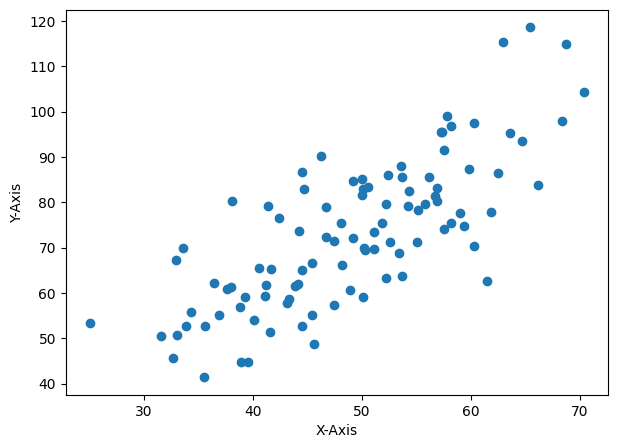

In [32]:
# Preprocessing Input data
data = pd.read_csv('data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.show()

In [33]:
data.head()

,X,Y
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518


à vous
<br>

Implémenter le modèle de façon itérative pour trouver le coefficient a et l'intercept b. Vous devez obtenir a = 1.28 et b= 9.90

En exécutant le code suivant, donner la MSE de vôtre modèle pour le dataset d'entraînement.

In [1]:
from sklearn.metrics import mean_squared_error

n = len(X)
Xmoy = X.mean()
Ymoy = Y.mean()

var=0
cov=0

for i in range (n) :
    var += (X[i] - Xmoy)**2
    cov += (X[i] - Xmoy)*(Y[i] - Ymoy)
    
a = cov/var
b = Ymoy - a* Xmoy
y_pred = a * X + b

mse = mean_squared_error(Y, y_pred)
print(f"\nErreur Quadratique Moyenne (MSE) : {mse:.4f}")




NameError: name 'X' is not defined

Affichez également la RMSE pour le dataset d'entraînement

# Régression linéaire en 6 lines de Python

   Il est possible de réaliser une régression linéaire avec de nombreuses
librairies Python. Une des librairies les plus utilisées est Sklearn.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

Après avoir chargé les données, il faut convertir les données en liste (array) grâce à la lib Numpy

In [36]:
data = pd.read_csv('data.csv')
X = data.iloc[:, 0].values.reshape(-1, 1) # values converts it into a numpy array
Y = data.iloc[:, 1].values.reshape(-1, 1) # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

À vous !
Afficher le coefficient $a$ obtenu par la fonction LinearRegression()

In [48]:
a = linear_regressor.coef_[0][0]
b = linear_regressor.intercept_[0]
print(a)
print(b)

1.2873573700109313
9.908606190326537


Affichez également la MSE et la RMSE en complétant le code ci-dessous. Votre RMSE doit être égale à ~10.36

In [49]:
from sklearn.metrics import r2_score

mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)
rmse = np.sqrt(mse)
print(f"Erreur Quadratique Moyenne (MSE) : {mse:.4f}")
print(f"Racine carrée Erreur Quadratique Moyenne (RMSE) : {rmse:.4f}")
print(f"Coefficient de détermination (R²) : {r2:.4f}")


Erreur Quadratique Moyenne (MSE) : 107.4704
Racine carrée Erreur Quadratique Moyenne (RMSE) : 10.3668
Coefficient de détermination (R²) : 0.5872


Afficher sur un même graphique les données sur l axe des X/Y ainsi que la droite de régression obtenue. Vous devez obrenir le graph suivant

# La fonction OLS

La régression linéaire LinearRegression() fait référence à la relation LINÉAIRE entre une ou plusieurs
variables. La fonction LinearRegression() vous permet d'utiliser d'autres méthodes que celle des moindres carrés (que nous ne verrons pas dans ce cours). La fonction OLS (Ordinary Least Square) au contraire, impose la méthode des
moindres carré. Utiliser la fonction LinearRegression()
la méthode des moindres carrés vous donne des résultats similaire à la fonction OLS() mais cette dernière vous permet d'avoir davantage d'informations.



Afficher le résultat du modèle avec la fonction summary()

La syntaxe pour utiliser la fonction summary() est

model_fit.summary()

In [44]:
import statsmodels.api as sm
X_OLS = sm.add_constant(X)

model = sm.OLS(endog=Y, exog=X_OLS)
model_fit = model.fit()
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     138.0
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           2.43e-20
Time:                        18:38:20   Log-Likelihood:                -372.00
No. Observations:                  99   AIC:                             748.0
Df Residuals:                      97   BIC:                             753.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9086      5.486      1.806      0.074      -0.980      20.797
x1             1.2874      0.110     11.746      0.000       1.070       1.505
==============================================================================
Omnibus:                        0.774   Durbin-Watson:                   2.206
Prob(Omnibus):                  0.679   Jarque-Bera (JB):                0.895
Skew:                           0.179   Prob(JB):                        0.639
Kurtosis:                       2.703   Cond. No.                         261.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Régression polynomiale
La régression linéaire univariée (une variable dépendante) et multivariée (plus d'une variable dépendante) dont nous avons parlé jusqu'à présent suppose toujours une relation linéaire entre les variables indépendantes et dépendantes. Dans le monde réel, il est très fréquent de disposer de données pour lesquelles il existe une relation non linéaire entre les variables indépendantes et dépendantes. Dans ce cas, nous pouvons utiliser la régression polynomiale en supposant que la relation entre la variable indépendante x et la (les) variable(s) dépendante(s) y est modélisée par un polynôme de nième degré en x.

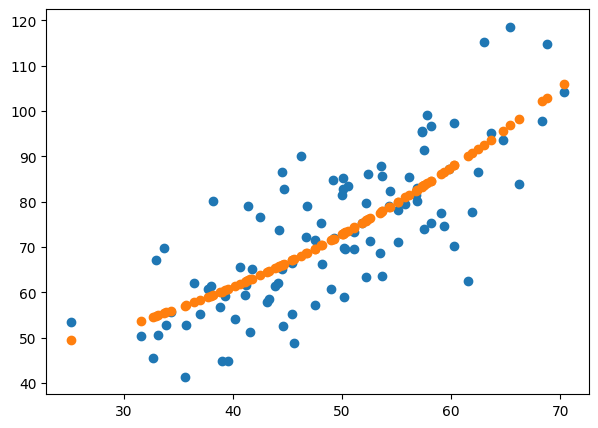

[[ 0.         -0.21464768  0.01531708]]
[45.31775504]


In [40]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree = 2)
X_poly = pr.fit_transform(X)
pr.fit(X_poly, Y)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y)
plt.scatter(X, Y)
plt.scatter(X, lin_reg.predict(pr.fit_transform(X)))
plt.show()

print(lin_reg.coef_)
print(lin_reg.intercept_)


Donner l'équation du modèle

L'équation du modèle est y = -0.2146 *x + 0.0153* x**2 + 45.3178

# Données d'entraînement (train) et de test

Pour construire un bon modèle, nous devons d'abord diviser notre ensemble
de données en un ensemble d'entraînement (ou données d'apprentissage) et un ensemble de test. Nous
utiliserons notre ensemble d'entraînement pour former notre modèle,
et nous utiliserons notre ensemble de test pour la validation du modèle.
Pour ce faire, nous allons utiliser la fonction train_test_split de
sklearn, et définir le paramètre d'entrée test_size à .2 afin que 20\%
des données soient assignées à l'ensemble de test et 80\% des données
soient assignées à l'ensemble d'entraînement.

**Nous mettons de côté l'ensemble de test et ne le regardons qu'à la fin
pour évaluer les performances du modèle sur des données non vues.

Nous faisons cela afin de nous assurer que nous ne testons pas ce que le
modèle a déjà appris. De cette façon, nous ne nous contentons pas de
résoudre les données que nous connaissons et nous pouvons vérifier si notre
modèle est applicable lorsque nous ne connaissons pas les valeurs de
sortie. Par conséquent, nous pouvons également vérifier si le modèle n'est pas en overfitting.

Nous fixons l'initialisation aléatoire de sorte que chaque fois que nous exécutons
le code train_test_split, nous obtenons la même distribution de
données. Ceci est important car le fait de garder la répartition des
données constante nous permet de comparer les résultats de différentes
sessions.

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3,random_state=42)

X_train.size

69

À vous

Appliquer linear_regressor.fit() et LinearRegression() en polynomiale à votre trainset. Afficher la MSE, le R2 et la RMSE pour les données de test pour chaque modèle.

Régression Linéaire- MSE: 98.4612, RMSE: 9.9228, R²: 0.5277
Régression OLS- MSE: 98.4612, RMSE: 9.9228, R²: 0.5277
Régression Polynomiale- MSE: 94.0764, RMSE: 9.6993, R²: 0.5487


<function matplotlib.pyplot.show(close=None, block=None)>

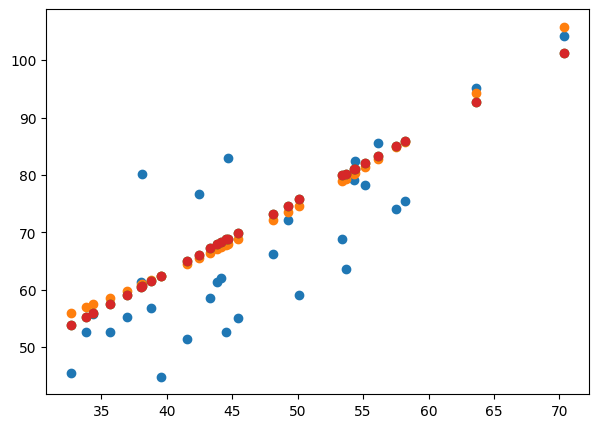

In [73]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)
Y_pred_linear = linear_regressor.predict(X_test)

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, Y_train)
Y_pred_poly = poly_regressor.predict(X_test_poly)

model = sm.OLS(endog=Y_train, exog=sm.add_constant(X_train))
model_fit = model.fit()
Y_pred_ols = model_fit.predict(sm.add_constant(X_test))

mseL = mean_squared_error(Y_test, Y_pred_linear)
rmseL = np.sqrt(mseL)
r2L = r2_score(Y_test, Y_pred_linear)

mseP = mean_squared_error(Y_test, Y_pred_poly)
rmseP = np.sqrt(mseP)
r2P = r2_score(Y_test, Y_pred_poly)

mseO = mean_squared_error(Y_test, Y_pred_ols)
rmseO = np.sqrt(mseO)
r2O = r2_score(Y_test, Y_pred_ols)

print(f"Régression Linéaire- MSE: {mseL:.4f}, RMSE: {rmseL:.4f}, R²: {r2L:.4f}")
print(f"Régression OLS- MSE: {mseO:.4f}, RMSE: {rmseO:.4f}, R²: {r2O:.4f}")
print(f"Régression Polynomiale- MSE: {mseP:.4f}, RMSE: {rmseP:.4f}, R²: {r2P:.4f}")


plt.scatter(X_test,Y_test)
plt.scatter(X_test,Y_pred_poly)
plt.scatter(X_test,Y_pred_linear)
plt.scatter(X_test,Y_pred_ols)
plt.show


Comparer les deux modèles

Au centre du modèle les predictions sont plus 
Les prédictions du modèle Polynomial sont plus précises avec un r2 plus grand avec donc moins de dispertion et un RMSE plus faible signifiant un bon ajustement